In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:

df = pd.read_csv("car_ownership.csv")
df.head(3)

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1


In [5]:
X = df[['monthly_salary']]
y = df['owns_car']

In [6]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = LogisticRegression()
model.fit(X_training, y_training)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8888888888888888

In [8]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def prediction_function(salary, model):
    z = model.coef_ * salary + model.intercept_
    y = sigmoid(z[0][0])
    return y

prediction_function(62000, model)

0.954690678813166

In [9]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5, 0],
       [1, 3]])

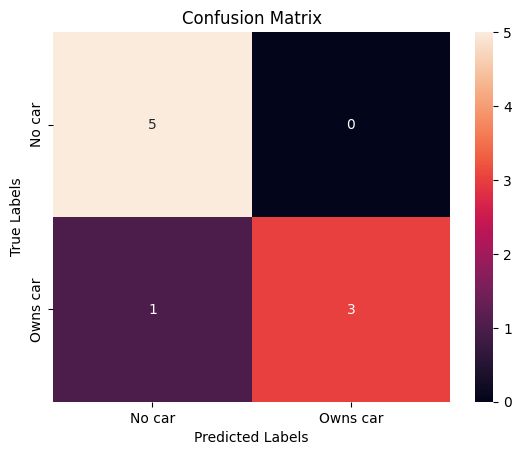

In [12]:
import seaborn as sns
classes = ['No car', 'Owns car']
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()